## Yolo 적용을 위한 파이썬과 딥러닝 이해
# 이미지 효과 적용하기

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 이미지 불러오기

In [2]:
bob = plt.imread('bob_dylan.jpg')

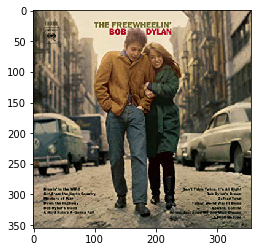

In [3]:
plt.imshow(bob)

In [4]:
bob.shape # 행렬 형태

(355, 355, 3)

In [5]:
bob.dtype # 숫자 타입

dtype('uint8')

In [6]:
bob.max(), bob.min() # 최대, 최소값

(255, 0)

### 실수형 이미지로 변환

In [7]:
bob = bob/255.

In [8]:
bob.shape, bob.max(), bob.min(), bob.dtype

((355, 355, 3), 1.0, 0.0, dtype('float64'))

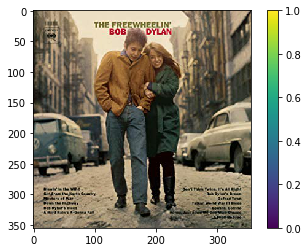

In [10]:
plt.imshow(bob)
plt.colorbar()

### 이미지 밝기 조정

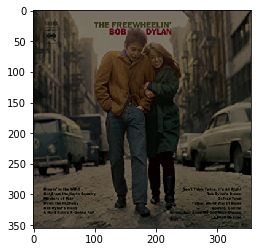

In [12]:
bob2 = bob*0.5

plt.imshow(bob2)

- 두 이미지 합치기 (액자 효과)

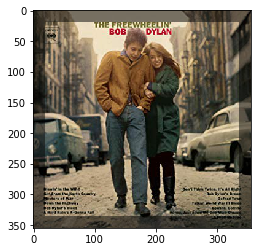

In [13]:
bob2[20:-20, 20:-20] = bob[20:-20, 20:-20]
plt.imshow(bob2)

- 이미지 밝게 하기

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


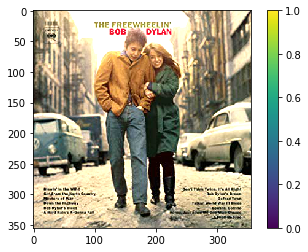

In [14]:
bob2 = bob*1.5

plt.imshow(bob2)
plt.colorbar()

In [15]:
bob2.max(), bob2.min()

(1.5, 0.0)

- Numpy 어레이에서 조건 지정하기

In [16]:
bob2[bob2>1]

array([1.04705882, 1.12352941, 1.14705882, ..., 1.02352941, 1.01176471,
       1.00588235])

1.0


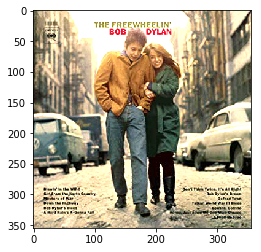

In [18]:
bob2[bob2>1] = 1

print(bob2.max())

plt.imshow(bob2)

In [19]:
bob2>1

array([[[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       ...,

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False,

### 조건식 적용 방법

In [20]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [21]:
a>5

array([[False, False, False, False],
       [False, False,  True,  True],
       [ True,  True,  True,  True]])

In [22]:
a[a>5]

array([ 6,  7,  8,  9, 10, 11])

In [24]:
a[a>5] = 5
a

array([[0, 1, 2, 3],
       [4, 5, 5, 5],
       [5, 5, 5, 5]])

In [26]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [27]:
a[:,1]>5

array([False, False,  True])

In [28]:
a[[False, False, True]]

array([[ 8,  9, 10, 11]])

In [29]:
a[:, [True, False, True, False]]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

- 밝기 하한 정하기

0.5


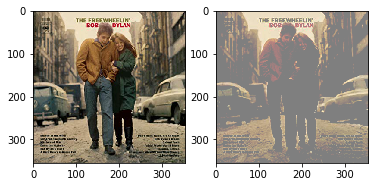

In [41]:
bob = plt.imread('bob_dylan.jpg')
bob = bob/255.

bob2 = bob.copy()
bob2[bob2<0.5] = 0.5

print(bob2.min())

plt.subplot(1,2,1)
plt.imshow(bob, vmin=0, vmax=1)

plt.subplot(1,2,2)
plt.imshow(bob2, vmin=0, vmax=1)

- 밝기 상한 정하기

0.7


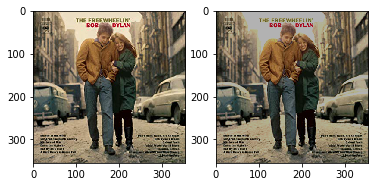

In [48]:
bob = plt.imread('bob_dylan.jpg')
bob = bob/255.

bob2 = bob.copy()
bob2[bob2>0.7] = 0.7

print(bob2.max())

plt.subplot(1,2,1)
plt.imshow(bob, vmin=0, vmax=1)

plt.subplot(1,2,2)
plt.imshow(bob2, vmin=0, vmax=1)

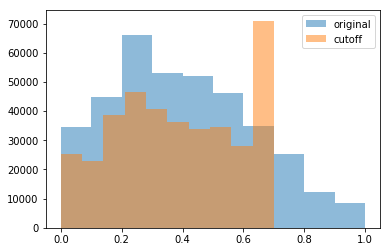

In [49]:
plt.hist(bob.ravel(), alpha=0.5)
plt.hist(bob2.ravel(), alpha=0.5)
plt.legend(['original', 'cutoff'])

### 특정 색상 조정

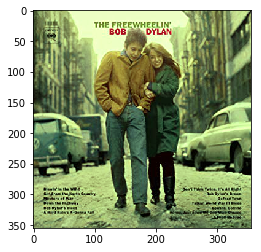

In [54]:
bob2 = bob.copy()

bob2[:,:,1] = bob2[:,:,1]*1.3
bob2[bob2>1] = 1

plt.imshow(bob2)

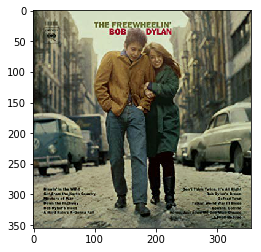

In [55]:
bob2 = bob.copy()

bob2[:,:,0] = bob2[:,:,0]*0.9

plt.imshow(bob2)

### 이미지 전환

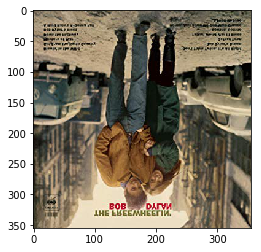

In [56]:
plt.imshow(bob[::-1])

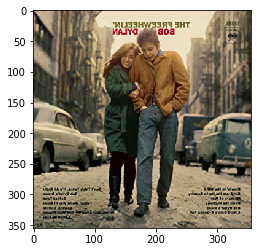

In [58]:
plt.imshow(bob[:,::-1])

### 이미지 샘플링

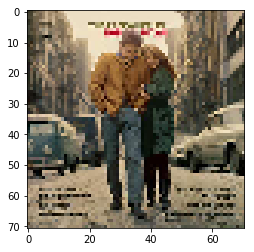

In [61]:
plt.imshow(bob[::5, ::5])

### 순서 바꾸기 (또는 뽑아내기)

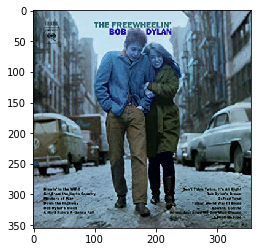

In [62]:
plt.imshow(bob[:, :, [2,1,0]])

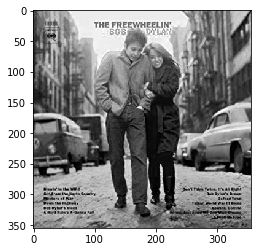

In [63]:
plt.imshow(bob[:, :, [0,0,0]])

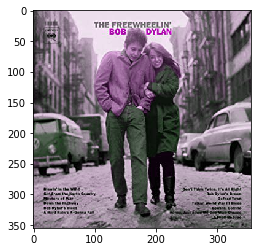

In [64]:
plt.imshow(bob[:, :, [0,1,0]])

- 목록을 넣으면 해당 인덱스들을 뽑아낸다

In [66]:
a = np.arange(12).reshape(4,3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [67]:
a[[0,2]]

array([[0, 1, 2],
       [6, 7, 8]])

In [68]:
a[:, [0,2]]

array([[ 0,  2],
       [ 3,  5],
       [ 6,  8],
       [ 9, 11]])

In [69]:
a[[3,0,2,1]]

array([[ 9, 10, 11],
       [ 0,  1,  2],
       [ 6,  7,  8],
       [ 3,  4,  5]])

- np.where() 함수를 이용해 원하는 값을 지정할 수 있다.

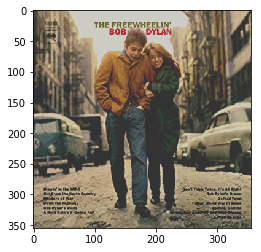

In [70]:
bob2 = np.where(bob>0.8, 0.8, bob)
bob2 = np.where(bob<0.2, 0.2, bob2)

plt.imshow(bob2)

In [72]:
np.where(a>5)

(array([2, 2, 2, 3, 3, 3], dtype=int64),
 array([0, 1, 2, 0, 1, 2], dtype=int64))

### 다차원 행렬 축 지정
- axis=0 : 아래방향, axis=1 : 옆방향, axis=2 : 깊이(채널)방향

In [73]:
bob2 = bob.mean(axis=2)
bob2.shape

(355, 355)

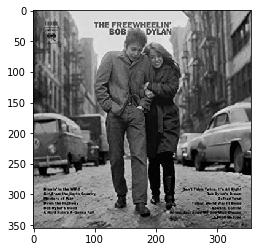

In [75]:
plt.imshow(bob2, vmin=0, vmax=1, cmap='gray')

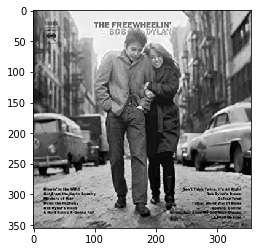

In [76]:
bob2 = bob.max(axis=2)
plt.imshow(bob2, vmin=0, vmax=1, cmap='gray')

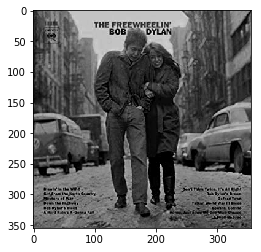

In [77]:
bob2 = bob.min(axis=2)
plt.imshow(bob2, vmin=0, vmax=1, cmap='gray')

In [78]:
bob.max(), bob.min(), bob.sum(), bob.mean(), bob.std()

(1.0, 0.0, 152291.6705882353, 0.4028080951880852, 0.23303071358018634)